In [162]:
# Juliana Ballin Lima - 2315310011

In [164]:
# Classificação de Atletas
# Este notebook tem como objetivo realizar a classificação de atletas em diferentes 
# categorias utilizando algoritmos de aprendizado de máquina. 

# Etapas principais:
# 1. Leitura e preparação dos dados.
# 2. Treinamento dos modelos.
# 3. Avaliação do desempenho utilizando métricas como acurácia, precisão, recall e F1-score.
# 4. Visualizações para interpretar os resultados.

In [166]:
import pandas as pd  # Manipulação de dados
import numpy as np  # Cálculos numéricos e arrays
from sklearn.datasets import load_linnerud  # Conjunto de dados Linnerud
from sklearn.model_selection import train_test_split  # Divisão de dados
from sklearn.preprocessing import StandardScaler  # Normalização de dados
from sklearn.neighbors import KNeighborsClassifier  # KNN para classificação
from sklearn.svm import SVC  # Modelo SVM
from sklearn.ensemble import RandomForestClassifier  # Modelo Random Forest
from sklearn.metrics import accuracy_score, classification_report  # Avaliação de modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matriz de confusão
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [168]:
# Passo 1: Carregar os dados do conjunto Linnerud

from sklearn.datasets import load_linnerud
import pandas as pd

# Carregar os dados
linnerud = load_linnerud()

# Variaveis de entrada
features = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
# Variaveis de saída
targets = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

In [170]:
# Mostrar as variaveis de entrada
print(features)
# Mostrar as variaveis de saída
print(targets)

    Chins  Situps  Jumps
0     5.0   162.0   60.0
1     2.0   110.0   60.0
2    12.0   101.0  101.0
3    12.0   105.0   37.0
4    13.0   155.0   58.0
5     4.0   101.0   42.0
6     8.0   101.0   38.0
7     6.0   125.0   40.0
8    15.0   200.0   40.0
9    17.0   251.0  250.0
10   17.0   120.0   38.0
11   13.0   210.0  115.0
12   14.0   215.0  105.0
13    1.0    50.0   50.0
14    6.0    70.0   31.0
15   12.0   210.0  120.0
16    4.0    60.0   25.0
17   11.0   230.0   80.0
18   15.0   225.0   73.0
19    2.0   110.0   43.0
    Weight  Waist  Pulse
0    191.0   36.0   50.0
1    189.0   37.0   52.0
2    193.0   38.0   58.0
3    162.0   35.0   62.0
4    189.0   35.0   46.0
5    182.0   36.0   56.0
6    211.0   38.0   56.0
7    167.0   34.0   60.0
8    176.0   31.0   74.0
9    154.0   33.0   56.0
10   169.0   34.0   50.0
11   166.0   33.0   52.0
12   154.0   34.0   64.0
13   247.0   46.0   50.0
14   193.0   36.0   46.0
15   202.0   37.0   62.0
16   176.0   37.0   54.0
17   157.0   32.0   52.0


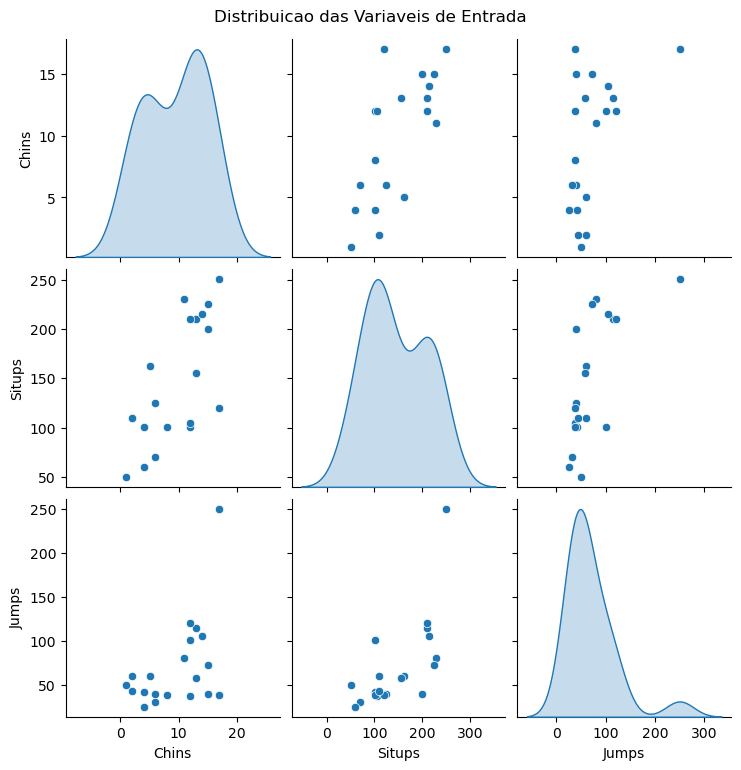

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar as variaveis de entrada
sns.pairplot(features, diag_kind='kde')
plt.suptitle('Distribuicao das Variaveis de Entrada', y=1.02)
plt.show()

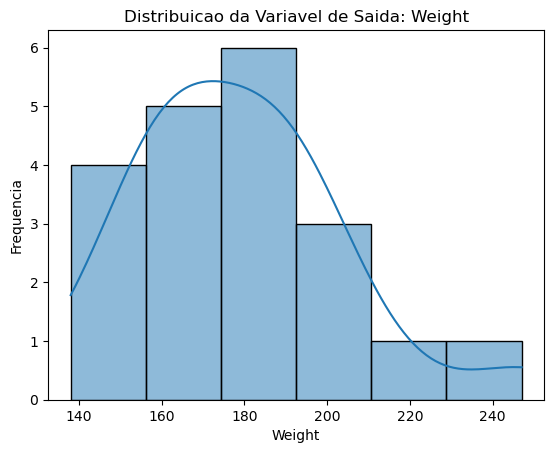

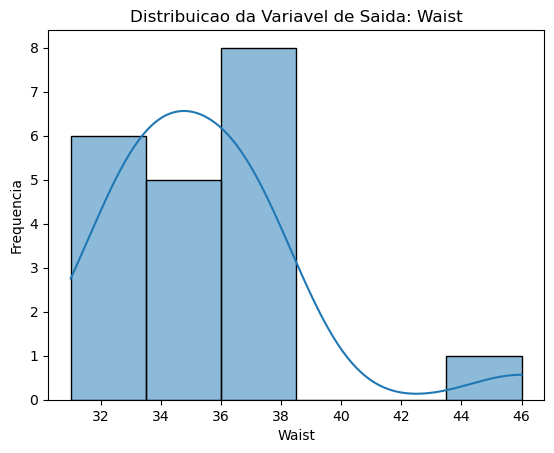

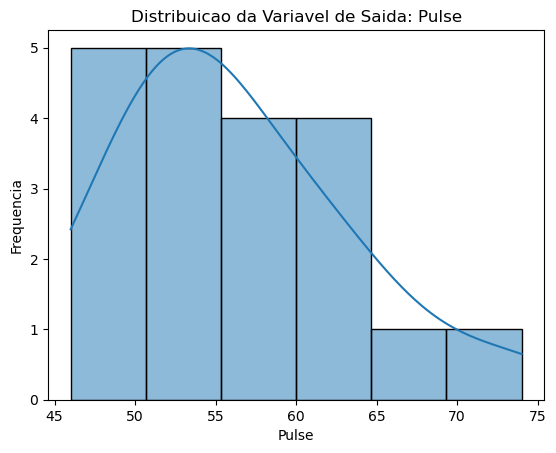

In [173]:
# Visualizar a distribuicao das variaveis de saída
for column in targets.columns:
    plt.figure()
    sns.histplot(targets[column], kde=True)
    plt.title(f'Distribuicao da Variavel de Saida: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.show()

In [174]:
# Passo 2:Verificar e corrigir dados

#Verificar dados ausentes ou inconsistentes
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
print(df.isnull().sum())  # Verificar valores ausentes

# Substituir valores ausentes, se existirem
df.fillna(df.mean(), inplace=True)

# Verificar inconsistências (valores fora do intervalo esperado)
print(df.describe()) 

Chins     0
Situps    0
Jumps     0
dtype: int64
           Chins      Situps      Jumps
count  20.000000   20.000000   20.00000
mean    9.450000  145.550000   70.30000
std     5.286278   62.566575   51.27747
min     1.000000   50.000000   25.00000
25%     4.750000  101.000000   39.50000
50%    11.500000  122.500000   54.00000
75%    13.250000  210.000000   85.25000
max    17.000000  251.000000  250.00000


In [175]:
# Passo 3: Dividir os dados

# Variáveis de entrada (X) e saída (y)
X = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
y_raw = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

# Criar categorias para a variável de saída com base no pulso
y = pd.cut(y_raw['Pulse'], bins=3, labels=['Baixo', 'Médio', 'Alto'])

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


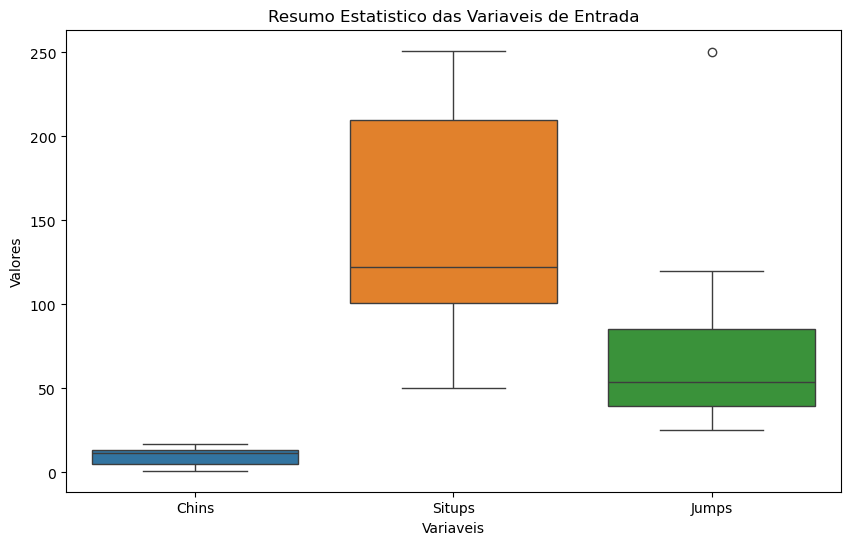

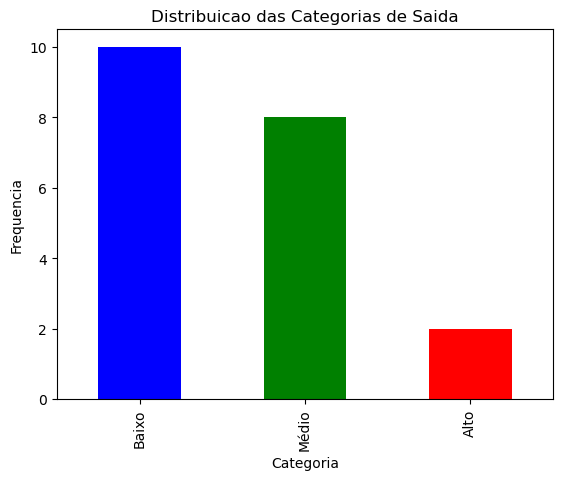

In [180]:
# Graficos de resumo estatistico para entrada
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Resumo Estatistico das Variaveis de Entrada')
plt.xlabel('Variaveis')
plt.ylabel('Valores')
plt.show()

# Grafico de barras para as categorias de saida
y.value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribuicao das Categorias de Saida')
plt.xlabel('Categoria')
plt.ylabel('Frequencia')
plt.show()

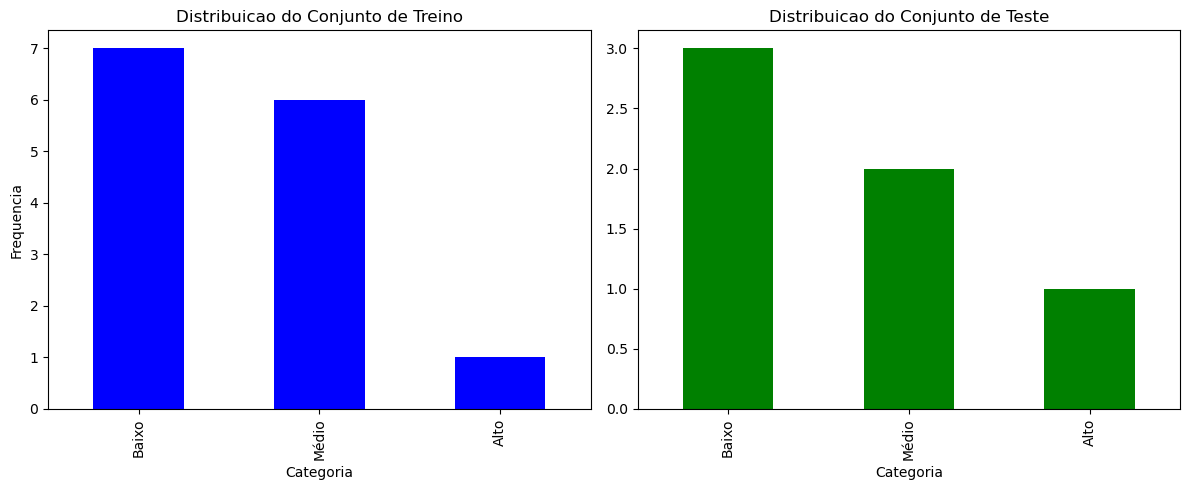

In [182]:
 
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

train_counts.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Distribuicao do Conjunto de Treino')
ax[0].set_xlabel('Categoria')
ax[0].set_ylabel('Frequencia')

test_counts.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Distribuicao do Conjunto de Teste')
ax[1].set_xlabel('Categoria')

plt.tight_layout()
plt.show()


In [183]:
# Passo 4: Normalizar os dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Resultados do modelo KNN:
Acurácia: 0.50
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         1
       Baixo       0.50      0.67      0.57         3
       Médio       0.50      0.50      0.50         2

    accuracy                           0.50         6
   macro avg       0.33      0.39      0.36         6
weighted avg       0.42      0.50      0.45         6



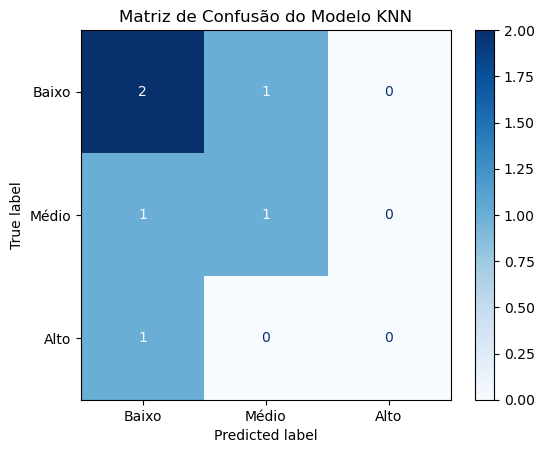

In [186]:
# Passo 5: Criar e testar o modelo KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar o modelo KNN
print("\nResultados do modelo KNN:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=['Baixo', 'Médio', 'Alto'])
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Baixo', 'Médio', 'Alto'])
disp_knn.plot(cmap='Blues')
plt.title('Matriz de Confusão do Modelo KNN')
plt.show()


Resultados do modelo SVM:
Acurácia: 0.33
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         1
       Baixo       0.40      0.67      0.50         3
       Médio       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.13      0.22      0.17         6
weighted avg       0.20      0.33      0.25         6



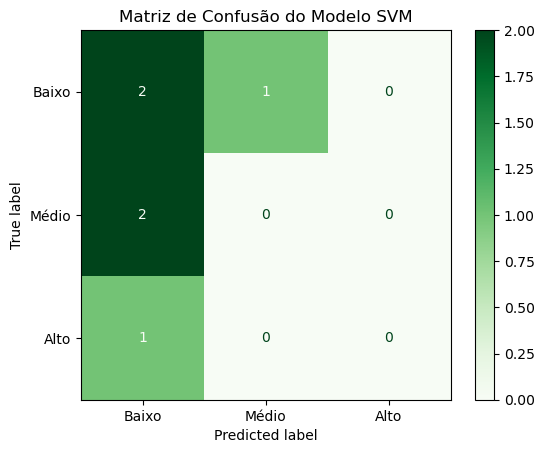

In [188]:
# Passo 6: Criar e testar o modelo SVM

# Criar e treinar o modelo SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Avaliar o modelo SVM
print("\nResultados do modelo SVM:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Matriz de confusão
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['Baixo', 'Médio', 'Alto'])
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Baixo', 'Médio', 'Alto'])
disp_svm.plot(cmap='Greens')
plt.title('Matriz de Confusão do Modelo SVM')
plt.show()

In [190]:
# Teste 1: Ajuste de hiperparâmetros e combinação dos modelos
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Resolver problema de classes pouco representadas
# Filtrar classes com pelo menos 2 ocorrências para evitar erros durante a validação
from collections import Counter
class_counts = Counter(y_train)
valid_classes = [cls for cls, count in class_counts.items() if count > 1]
X_train_filtered = X_train_scaled[np.isin(y_train, valid_classes)]
y_train_filtered = y_train[np.isin(y_train, valid_classes)]

# Ajuste de hiperparâmetros para KNN (melhorar o desempenho do KNN com validação cruzada)
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3)
grid_knn.fit(X_train_filtered, y_train_filtered)
melhor_knn = grid_knn.best_estimator_
print(f"Melhores parâmetros para KNN: {grid_knn.best_params_}")

# Ajuste de hiperparâmetros para SVM (melhorar o desempenho do SVM com validação cruzada)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=3)
grid_svm.fit(X_train_filtered, y_train_filtered)
melhor_svm = grid_svm.best_estimator_
print(f"Melhores parâmetros para SVM: {grid_svm.best_params_}")

# Combinação dos modelos ajustados (ensemble para melhorar a estabilidade e precisão do modelo)
voting_clf = VotingClassifier(
    estimators=[('knn', melhor_knn), ('svm', melhor_svm)], 
    voting='soft'
)
voting_clf.fit(X_train_filtered, y_train_filtered)
accuracy = voting_clf.score(X_test_scaled, y_test)
print(f"Acurácia do ensemble (ajustada): {accuracy:.2f}")

Melhores parâmetros para KNN: {'n_neighbors': 7}
Melhores parâmetros para SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Acurácia do ensemble (ajustada): 0.33


In [214]:
# Teste 2: Balanceamento dos dados com SMOTE e avaliação do ensemble
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Aplicar SMOTE para balancear os dados (gerar amostras sintéticas para classes minoritárias)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_filtered, y_train_filtered)

# Treinar o ensemble com dados balanceados
voting_clf.fit(X_train_balanced, y_train_balanced)

# Avaliar o desempenho no conjunto de teste
y_pred = voting_clf.predict(X_test_scaled)
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred):.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Acurácia no conjunto de teste: 0.33
Relatório de Classificação:
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         1
       Baixo       0.50      0.33      0.40         3
       Médio       0.25      0.50      0.33         2

    accuracy                           0.33         6
   macro avg       0.25      0.28      0.24         6
weighted avg       0.33      0.33      0.31         6



In [216]:
# Teste 3: Validação Cruzada

from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

# Configuração de validação cruzada com LeaveOneOut
cv = LeaveOneOut()

# Garantir que o número de vizinhos não exceda o número de amostras disponíveis
def get_valid_n_neighbors(max_n, X_train):
    return [n for n in max_n if n < len(X_train)]

# Ajuste para KNN
try:
    n_neighbors_range = get_valid_n_neighbors([3, 5, 7, 9, 11], X_train_scaled)
    if not n_neighbors_range:
        raise ValueError("Nenhum valor válido para n_neighbors. Adicione mais dados ou ajuste os parâmetros.")
    
    param_grid_knn = {'n_neighbors': n_neighbors_range}
    grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, error_score='raise')
    grid_knn.fit(X_train_scaled, y_train)
    print(f"Melhores parâmetros para KNN: {grid_knn.best_params_}")
    print(f"Acurácia: {grid_knn.best_score_:.2f}")
except ValueError as e:
    print(f"Erro ao ajustar o KNN: {e}")

# Ajuste para SVM
try:
    param_grid_svm = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
    grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=cv, error_score='raise')
    grid_svm.fit(X_train_scaled, y_train)
    print(f"Melhores parâmetros para SVM: {grid_svm.best_params_}")
    print(f"Acurácia: {grid_svm.best_score_:.2f}")
except ValueError as e:
    print(f"Erro ao ajustar o SVM: {e}")


Melhores parâmetros para KNN: {'n_neighbors': 11}
Acurácia: 0.50
Melhores parâmetros para SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Acurácia: 0.57
